<a href="https://colab.research.google.com/github/safranco8/entregables-grupo-31/blob/main/AEyC/Nueva%20entrega/AEyC_Entregable_Parte_2_25_08_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

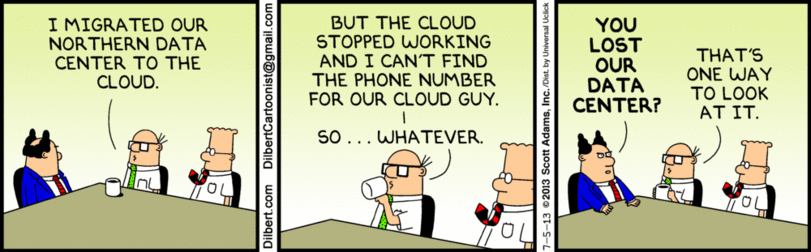

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
#10 Importación de librerias

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
seaborn.set_context('talk')

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
#20 Lectura del conjunto de datos procesados en Entregable 1 desde GitHub, en formato CSV 

url='https://raw.githubusercontent.com/safranco8/entregables-grupo-31/main/AEyC/melb_data_practico1.csv'
melb_data_practico1_df = pandas.read_csv(url)
melb_data_practico1_df[:3]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,zipcode_count,avg_security_deposit,avg_cleaning_fee
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,130.62,2187.03,605.15,258.0,238.14,57.54
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,130.62,2187.03,605.15,258.0,238.14,57.54
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,130.62,2187.03,605.15,258.0,238.14,57.54


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


# Ejercicio 1: Encoding

1.   Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto **BuildingArea** y **YearBuilt**, que volveremos a imputar más adelante.

## **Respuesta del Ejercicio 1.1: Encoding**

In [ ]:
#030 Exploramos los tipos de datos de las columnas

for column in melb_data_practico1_df.columns:
    print(column, "---", melb_data_practico1_df[column].dtype)

Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
BuildingArea --- float64
YearBuilt --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
zipcode_count --- float64
avg_security_deposit --- float64
avg_cleaning_fee --- float64


In [ ]:
#040 Según la consigna, eliminamos las columnas BuildingArea y YearBuilt 
#para ello creamos una copia de nuestro dataframe original y verificamos como quedaron las columnas

melb_grupo31_reduced_df = melb_data_practico1_df.copy()

del melb_grupo31_reduced_df['BuildingArea']
del melb_grupo31_reduced_df['YearBuilt']

for column in melb_grupo31_reduced_df.columns:
    print(column, "---", melb_grupo31_reduced_df[column].dtype)


Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
zipcode_count --- float64
avg_security_deposit --- float64
avg_cleaning_fee --- float64


In [ ]:
#050 Exploramos la cantidad de registros
len(melb_grupo31_reduced_df.index) 

10009

# Ejercicio 1: Encoding

2.   Aplicar una codificación **One-hot encoding** a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.
**Algunas opciones:**
 
2.1.-   Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.

2.2.- DictVectorizer con algunos pasos de pre-proceso previo.

## **Respuesta del ejercicio 1.2: Encoding**




In [ ]:
#060 Seleccionamos los grupos de columnas categoricas y numéricas

feature_cols = ['Type', 'Suburb', 'Regionname', 'CouncilArea','Postcode']
numeric_cols = ['Rooms','Landsize','Distance','avg_price','avg_monthly_price','avg_weekly_price']


In [ ]:
#070 Aplicamos One Hot Encoder a todas las columnas de variable categórica

encoderC = OneHotEncoder(sparse=False)
encoderC.fit(melb_grupo31_reduced_df[feature_cols])
encoded_types = encoderC.transform(melb_grupo31_reduced_df[feature_cols])
encoded_types[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#080 Se puede observar que el One Hot Encoder ha hecho que se pierdan el nombre de las columnas
# Por ello al generar el Dataframe a partir de este, sigue sin nombre de las columnas

encoded_df = pandas.DataFrame(encoded_types)
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#090 Recuperamos el nombre de las columnas con el parametro ".categories_" para poder agregarlo al Dataframe
#NOTA: hay un arreglo por cada una de las variables categoricas

columna = list(encoderC.categories_)
columna

[array(['h', 't', 'u'], dtype=object),
 array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Balaclava', 'Balwyn', 'Balwyn North',
        'Bayswater', 'Bayswater North', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Blackburn', 'Blackburn North',
        'Blackburn South', 'Box Hill', 'Braybrook', 'Briar Hill',
        'Brighton', 'Brighton East', 'Broadmeadows', 'Brooklyn',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bundoora',
        'Burnside', 'Burnside Heights', 'Burwood', 'Burwood East',
        'Cairnlea', 'Camberwell', 'Campbellfield', 'Canterbury',
        'Carlton North', 'Carnegie', 'Caroline Springs', 'Caulfield',
        'Caulfield East', 'Caulfield North', 'Caulfield South',
        'Chadstone', 'Chelten

In [ ]:
#100 Recupero todos los nombres de columnas en un único arreglo para luego agregarlo al Dataframe
# Para ello recorro todos los arreglos que hay en "columna" y los guardo en "nombre_cols"
# Los nombres de columna van a contener el nombre original de la columna más el valor de la categoría generada por One Hot Encoder
# siguiendo el formato: "<nombre_categoría>: <categoría>" 

nombre_cols = []
for i in range(len(feature_cols)):
  for j in range(len(columna[i])):
    nombre_cols.append(str(feature_cols[i]) + ": " + str(columna[i][j]))

nombre_cols

['Type: h',
 'Type: t',
 'Type: u',
 'Suburb: Abbotsford',
 'Suburb: Aberfeldie',
 'Suburb: Airport West',
 'Suburb: Albanvale',
 'Suburb: Albert Park',
 'Suburb: Albion',
 'Suburb: Alphington',
 'Suburb: Altona',
 'Suburb: Altona Meadows',
 'Suburb: Altona North',
 'Suburb: Ardeer',
 'Suburb: Armadale',
 'Suburb: Ascot Vale',
 'Suburb: Ashburton',
 'Suburb: Ashwood',
 'Suburb: Aspendale',
 'Suburb: Aspendale Gardens',
 'Suburb: Attwood',
 'Suburb: Avondale Heights',
 'Suburb: Balaclava',
 'Suburb: Balwyn',
 'Suburb: Balwyn North',
 'Suburb: Bayswater',
 'Suburb: Bayswater North',
 'Suburb: Bellfield',
 'Suburb: Bentleigh',
 'Suburb: Bentleigh East',
 'Suburb: Blackburn',
 'Suburb: Blackburn North',
 'Suburb: Blackburn South',
 'Suburb: Box Hill',
 'Suburb: Braybrook',
 'Suburb: Briar Hill',
 'Suburb: Brighton',
 'Suburb: Brighton East',
 'Suburb: Broadmeadows',
 'Suburb: Brooklyn',
 'Suburb: Brunswick East',
 'Suburb: Brunswick West',
 'Suburb: Bulleen',
 'Suburb: Bundoora',
 'Suburb:

In [ ]:
#110 Renombramos las columnas del Dataframe para que ahora tengan un nombre entendible
melb_onehotencode_df = pandas.DataFrame(encoded_types)
melb_onehotencode_df.columns = nombre_cols
melb_onehotencode_df

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3190.0,Postcode: 3191.0,Postcode: 3192.0,Postcode: 3194.0,Postcode: 3195.0,Postcode: 3204.0,Postcode: 3205.0,Postcode: 3206.0,Postcode: 3207.0,Postcode: 3752.0
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#120 Agregamos las variables numéricas al Dataframe
melb_onehotencode_full_df = pandas.DataFrame(numpy.hstack([melb_onehotencode_df, melb_grupo31_reduced_df[numeric_cols]]))
melb_onehotencode_full_df.columns = numpy.concatenate([nombre_cols, numeric_cols]).ravel()
melb_onehotencode_full_df = pandas.DataFrame(melb_onehotencode_full_df)
melb_onehotencode_full_df.head()

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3205.0,Postcode: 3206.0,Postcode: 3207.0,Postcode: 3752.0,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,202.0,2.5,130.62,2187.03,605.15
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,156.0,2.5,130.62,2187.03,605.15
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,134.0,2.5,130.62,2187.03,605.15
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,94.0,2.5,130.62,2187.03,605.15
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,120.0,2.5,130.62,2187.03,605.15


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

## **Respuesta del ejercicio 2: Imputación por KNN**

In [ ]:
#130 Es necesario escalar los datos ya que las variables categóricas convertidas con OneHotEncoder 
# quedan comprendidas en valores entre 0 y 1 las variables numéricas tienen valores muy dispares para compararlas, 
# tales como Price con valores posibles hasta más de 2 millones o Bathroom con valores de 0 hasta 8

datos = melb_onehotencode_full_df.copy() #porque hay algunos NaN 
scaler = MinMaxScaler(feature_range=(0, 1))
melb_onehotencode_full_escalado = preprocessing.MinMaxScaler().fit_transform(datos)

#Agrego las columnas al df
melb_onehotencode_full_escalado_df  = pandas.DataFrame(melb_onehotencode_full_escalado)
melb_onehotencode_full_escalado_df.columns = melb_onehotencode_full_df.columns
melb_onehotencode_full_escalado_df

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3205.0,Postcode: 3206.0,Postcode: 3207.0,Postcode: 3752.0,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.152568,0.054545,0.114945,0.290187,0.311512
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.117825,0.054545,0.114945,0.290187,0.311512
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.101208,0.054545,0.114945,0.290187,0.311512
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.070997,0.054545,0.114945,0.290187,0.311512
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.090634,0.054545,0.114945,0.290187,0.311512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.193353,0.690909,0.060965,NaN,0.167950
10005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.492447,0.700000,0.105664,0.237998,0.256368
10006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.251511,0.250000,0.200104,0.277884,0.316480
10007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.329305,0.250000,0.200104,0.277884,0.316480


In [ ]:
#140 Según consigna 2.1 agregamos las columnas YearBuilt y BuildingArea

melb_data_mice = melb_onehotencode_full_escalado_df.copy(deep=True)
melb_data_mice['YearBuilt'] = melb_data_practico1_df['YearBuilt']
melb_data_mice['BuildingArea'] = melb_data_practico1_df['BuildingArea']
melb_data_mice.describe()


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3207.0,Postcode: 3752.0,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,...,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10002.000000,9037.000000,9354.000000,5898.000000,5101.000000
mean,0.708862,0.096613,0.194525,0.005295,0.003697,0.006294,0.000599,0.005395,0.003896,0.003097,...,0.012988,0.001599,0.621241,0.311467,0.409097,0.107566,0.311074,0.330093,1965.737199,129.633859
std,0.454310,0.295445,0.395854,0.072579,0.060691,0.079091,0.024478,0.073257,0.062303,0.055569,...,0.113229,0.039952,0.257366,0.203900,0.194039,0.090860,0.212702,0.202046,34.238653,51.666960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1857.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.141994,0.272727,0.061402,0.164564,0.197285,1950.000000,95.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.315710,0.413636,0.090187,0.264719,0.282155,1970.000000,123.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.472054,0.536364,0.116959,0.427135,0.426949,1997.000000,159.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,294.000000


In [ ]:
#150 Escalamos los valores de YearBuilt y BuildingArea

scaler = MinMaxScaler(feature_range=(0, 1))
melb_escalado_full = preprocessing.MinMaxScaler().fit_transform(melb_data_mice)

#Agrego las columnas al df

melb_escalado_full_df  = pandas.DataFrame(melb_escalado_full)
melb_escalado_full_df.columns = melb_data_mice.columns

#vemos que a pesar de tener todas las columnas escaladas, YearBuilt y BuildingArea tienen NaN
print(melb_escalado_full_df.isna().sum())
melb_escalado_full_NaN_df=melb_escalado_full_df.copy()
melb_escalado_full_NaN_df.head()


Type: h                  0
Type: t                  0
Type: u                  0
Suburb: Abbotsford       0
Suburb: Aberfeldie       0
                      ... 
avg_price                7
avg_monthly_price      972
avg_weekly_price       655
YearBuilt             4111
BuildingArea          4908
Length: 405, dtype: int64


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3207.0,Postcode: 3752.0,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.152568,0.054545,0.114945,0.290187,0.311512,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.117825,0.054545,0.114945,0.290187,0.311512,0.267081,0.268707
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.101208,0.054545,0.114945,0.290187,0.311512,0.267081,0.510204
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.070997,0.054545,0.114945,0.290187,0.311512,NaN,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.090634,0.054545,0.114945,0.290187,0.311512,0.975155,0.482993


In [ ]:
#160 Según consigna 2.2 aplicamos IterativeImputer y KNeighborsRegressor
# para completar los datos faltantes de las columnas YearBuilt y BuildingArea , avg_price, avg_monthly_price, avg_weekly_price 
#para luego verificar en los gráficos que los valores imputados sean cercanos al de los valores originales.

mice_imputer_df = melb_escalado_full_NaN_df.copy()
mice_imputer = IterativeImputer(random_state=1, estimator=KNeighborsRegressor(n_neighbors=2))
columnas_numericas =['YearBuilt', 'BuildingArea','avg_price','avg_monthly_price','avg_weekly_price']
mice_imputer_df = mice_imputer.fit_transform(mice_imputer_df[columnas_numericas])
mice_imputer_df2 = pandas.DataFrame(mice_imputer_df, index=melb_escalado_full_NaN_df[columnas_numericas].index, columns=melb_escalado_full_NaN_df[columnas_numericas].columns)

#Verificamos no haber perdido datos
print(len(mice_imputer_df),len(melb_escalado_full_NaN_df))

#Verificamos que se han completado los datos faltantes
print(mice_imputer_df2.isna().sum())


10009 10009
YearBuilt            0
BuildingArea         0
avg_price            0
avg_monthly_price    0
avg_weekly_price     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#170 Analizamos la imputación 
melb_aux1 = mice_imputer_df2.copy()
melb_aux1.describe()

,YearBuilt,BuildingArea,avg_price,avg_monthly_price,avg_weekly_price
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,0.666726,0.429894,0.107537,0.300406,0.325364
std,0.185039,0.158055,0.090841,0.207635,0.199715
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.577640,0.320748,0.061402,0.164564,0.197285
50%,0.670807,0.413265,0.090187,0.261986,0.282155
75%,0.773292,0.523810,0.116959,0.402604,0.426949
max,1.000000,1.000000,1.000000,1.000000,1.000000


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [ ]:
#180 Creamos un df auxiliar y borramos las columnas sin imputar y le concatenamos las imputadas

melb_aux2 = melb_escalado_full_NaN_df.copy()
del melb_aux2['YearBuilt']
del melb_aux2['BuildingArea']
melb_aux2[columnas_numericas] = melb_aux1[columnas_numericas]
melb_ohe_esc_YB_BA_KNN = melb_aux2.copy()
melb_ohe_esc_YB_BA_KNN

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Postcode: 3207.0,Postcode: 3752.0,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.152568,0.054545,0.114945,0.290187,0.311512,0.763975,0.573129
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.117825,0.054545,0.114945,0.290187,0.311512,0.267081,0.268707
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.101208,0.054545,0.114945,0.290187,0.311512,0.267081,0.510204
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.070997,0.054545,0.114945,0.290187,0.311512,0.763975,0.573129
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.090634,0.054545,0.114945,0.290187,0.311512,0.975155,0.482993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.193353,0.690909,0.060965,0.049369,0.167950,0.593168,0.653061
10005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.492447,0.700000,0.105664,0.237998,0.256368,0.770186,0.488095
10006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.251511,0.250000,0.200104,0.277884,0.316480,0.857143,0.452381
10007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.329305,0.250000,0.200104,0.277884,0.316480,0.869565,0.705782


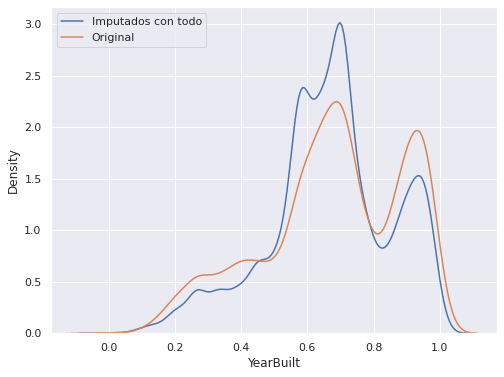

In [ ]:
#190 graficamos YearBuilt y verificamos que los valores imputados sean cercanos al de los valores originales 

seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_ohe_esc_YB_BA_KNN.YearBuilt,label="Imputados con todo")
ax = seaborn.kdeplot(melb_escalado_full_NaN_df.YearBuilt,label="Original")
ax.legend()

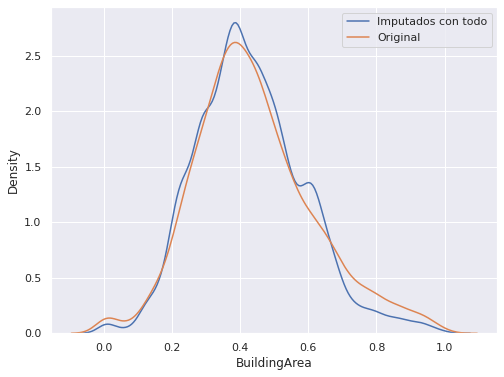

In [ ]:
#200 graficamos BuildingArea y verificamos que los valores imputados sean cercanos al de los valores originales 
seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_ohe_esc_YB_BA_KNN.BuildingArea,label="Imputados con todo")
ax = seaborn.kdeplot(melb_escalado_full_NaN_df.BuildingArea,label="Original")
ax.legend()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
#210 Estandarizamos los datos (rango -1/+1) para poder aplicar PCA
#NOTA: pasamos de una Dataframe a un arreglo de numpy, por lo que se pierden los nombre de columnas que
# luego recuperaremos

pca_init = numpy.nan_to_num(melb_ohe_esc_YB_BA_KNN.copy()) 
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_pca = scaler.fit_transform(pca_init)

In [ ]:
#220 Convertimos el arreglo de numpy nuevamente a Dataframe y le agregamos los nombres de columna correspondiente

scaled_pca_df = pandas.DataFrame(scaled_pca)
scaled_pca_df
scaled_pca_df.columns = numpy.concatenate([nombre_cols, numeric_cols, ["YearBuilt", "BuildingArea"]]).ravel()
print(scaled_pca_df.columns)

Index(['Type: h', 'Type: t', 'Type: u', 'Suburb: Abbotsford',
       'Suburb: Aberfeldie', 'Suburb: Airport West', 'Suburb: Albanvale',
       'Suburb: Albert Park', 'Suburb: Albion', 'Suburb: Alphington',
       ...
       'Postcode: 3207.0', 'Postcode: 3752.0', 'Rooms', 'Landsize', 'Distance',
       'avg_price', 'avg_monthly_price', 'avg_weekly_price', 'YearBuilt',
       'BuildingArea'],
      dtype='object', length=405)


In [ ]:
#230 Respondemos consigna 3.1
# Aplicamos PCA para obtener los N=20 componentes principales del arreglo

n = min(20, scaled_pca.shape[0])
pca = PCA(n)
pca.fit(scaled_pca)
proyected_features = pca.transform(scaled_pca)

proyected_features

array([[-0.82574544,  1.38208624, -0.05184373, ..., -0.33094738,
         0.01516441, -0.21180845],
       [-0.83136788,  1.41697055, -0.06205993, ..., -0.49384062,
        -0.04194119, -0.33912341],
       [-0.95192777,  1.33010901, -0.2239415 , ..., -0.42212433,
         0.2091786 , -0.10101238],
       ...,
       [-1.09053388, -1.28211439,  0.37273707, ..., -0.22976106,
        -0.10359046, -0.02415878],
       [-1.12875522, -1.32018612,  0.30630308, ..., -0.19617279,
        -0.05421602,  0.02833112],
       [-1.16487782, -1.40543796,  0.16849291, ...,  0.09336446,
         0.44581878, -0.05007843]])

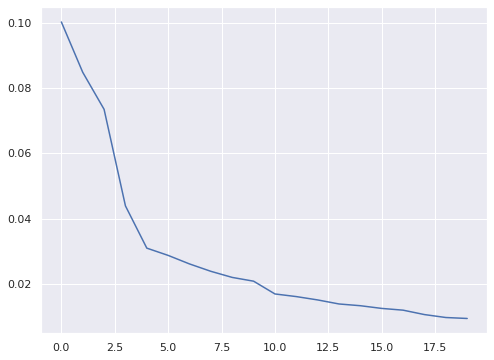

In [ ]:
#240 Respondemos consigna 3.2
# Graficamos varianza de cada componente N (las principales)

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)

In [ ]:
#250 Respondemos consigna 3.3
# En base al grafico anterior, consideramos que las 5 primeras componentes, son los más representativas y
# los agregamos como columnas a el Dataframe original

scaled_pca_df[['pca1_scaled', 'pca2_scaled', 'pca3_scaled', 'pca4_scaled', 'pca5_scaled']] = proyected_features[:,:5]
scaled_pca_df

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.770110,-0.419627,-0.376977,0.527950,0.146259,-0.825745,1.382086,-0.051844,-0.475862,-0.197391
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.770110,-0.419627,-0.376977,-0.465839,-0.462585,-0.831368,1.416971,-0.062060,-0.584834,-0.364808
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.770110,-0.419627,-0.376977,-0.465839,0.020408,-0.951928,1.330109,-0.223942,-0.555071,-0.237355
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.770110,-0.419627,-0.376977,0.527950,0.146259,-0.911401,1.330596,-0.151723,-0.460362,-0.096043
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.770110,-0.419627,-0.376977,0.950311,-0.034014,-1.001102,1.280301,-0.239118,-0.394016,0.051115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.878070,-0.901262,-0.664101,0.186335,0.306122,-1.232409,1.069963,-0.491138,0.020846,0.132104
10005,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.788672,-0.524004,-0.487264,0.540373,-0.023810,-0.871319,-0.368870,-0.915998,0.608207,0.143237
10006,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.599792,-0.444231,-0.367040,0.714286,-0.095238,-1.090534,-1.282114,0.372737,-0.220164,-0.068626
10007,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.599792,-0.444231,-0.367040,0.739130,0.411565,-1.128755,-1.320186,0.306303,-0.201621,-0.037990


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

### RESPUESTAS =

Estas operaciones ya las habiamos realizado previamente:

 * en la celda **#220** Se realizó la transformación del conjunto de datos procesado en un pandas.DataFrame. También se recuerda el nombre original de cada columna de la matriz, en el orden correcto.
 *  en la celda **#260** se guarda en un archivo.
 *   Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
#260 se guarda en un archivo
scaled_pca_df.to_csv("scaled_pca_df.csv", index=None)
from google.colab import files
files.download('scaled_pca_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  3. Todas las transformaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otros desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
1. Criterios de exclusión (o inclusión) de filas

Se eliminan los outliers de las variables numéricas dejando solo los valores menores a Ls o mayores a Li del siguiente gráfico:
```
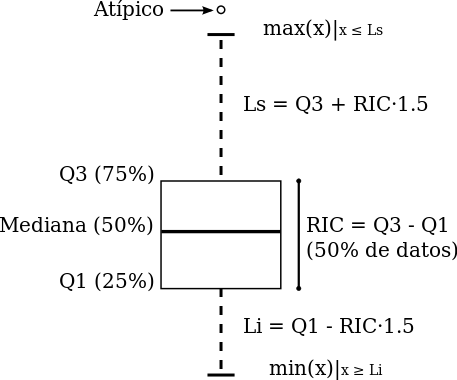


```
2. Interpretación de las columnas presentes

a.	Rooms: cantidad de habitaciones.
b.	Distance: distancia al centro de la ciudad.
c.	Price: precio de compra/venta de la propiedad.
d.	Landsize: tamaño del terreno.
e.	BuildingArea: metros cuadrados construidos.
f.	YearBuilt: año de construcción.
g.	avg_price: se agrega el precio promedio diario de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos]. 
h.	avg_weekly_price: se agrega el precio semanal diario de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos].
i.	avg_monthly_price: se agrega el precio promedio mensual de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos].
j.	Type: tipo de propiedad. 3 valores posibles.  h=house,cottage,villa, semi,terrace; u= unit, duplex; t=townhouse	
k.	Suburb 314 valores posibles de suburbios
l.	Regionname 8 valores posibles de regiones (West, North West, North, North east …etc)


3. Las transformaciones realizadas son:

1. Se redujo el Dataframe y se trató las variables categóricas con OneHotEncoding.
2.	Todas las características numéricas fueron escaladas usando MinMaxScaler previo a ser imputadas, 
 solo los valores distintos a NaN. 
 Al aplicar MinMaxScaler, reemplazaba los NaN por 0, así que solo se les
 aplicó a los valores no nulos, manteniendo los NaN para luego ser imputados.  
3.	Las columnas ‘YearBuilt’ y ‘BuildingArea’ fueron imputadas utilizando el algoritmo IterativeImputer, con el estimador KNeighborsRegressor. Se optó por un K=2  ya que imputaba más próximo a los datos originales.
3.	Se escalaron los datos con MinMaxScaler entre -1 y 1
4.	Se aplicó el método PCA para reducir la dimensionalidad y se calculó la varianza de las primeras 20 componentes.
5.	Se agregan las 5 primeras columnas obtenidas a través del método de PCA, ya que estas representan prácticamente el 80% de las componentes principales, para luego ser aplicado sobre el conjunto de datos totalmente procesado.
6. El dataset se lo pasa a CSV.
7. Se descarga el archivo *.csv con los datos procesados. 

```